In [1]:
%load_ext autoreload
%autoreload 2

In [109]:
from src.utils import read_csv
from src.preprocessor_utils import convert_to_lowercase
from src.data_preprocessor import DataPreprocessor
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [110]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')

In [111]:
trainX, trainY = DataPreprocessor().drop_outliers(trainX, trainY)
trainX = convert_to_lowercase(trainX)

In [112]:
# % of the number of data samples which have NA to the total number of data samples in training set
all_data_na = (trainX.isnull().sum() / len(trainX)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing %': all_data_na})

for each_na_feature in np.transpose(missing_data).columns:
    print('{}, dtype = {}'.format(each_na_feature, trainX[str(each_na_feature)].dtype))

missing_data.head(15)

floor_level, dtype = object
total_num_units, dtype = float64
tenure, dtype = object
available_unit_types, dtype = object
built_year, dtype = float64
num_baths, dtype = float64
subzone, dtype = object
planning_area, dtype = object
num_beds, dtype = float64


,Missing %
floor_level,82.601780
total_num_units,27.996222
tenure,8.554954
available_unit_types,7.153154
built_year,4.583188
num_baths,2.147437
subzone,0.561714
planning_area,0.561714
num_beds,0.397674


Text(0.5, 1.0, '% missing data by feature')

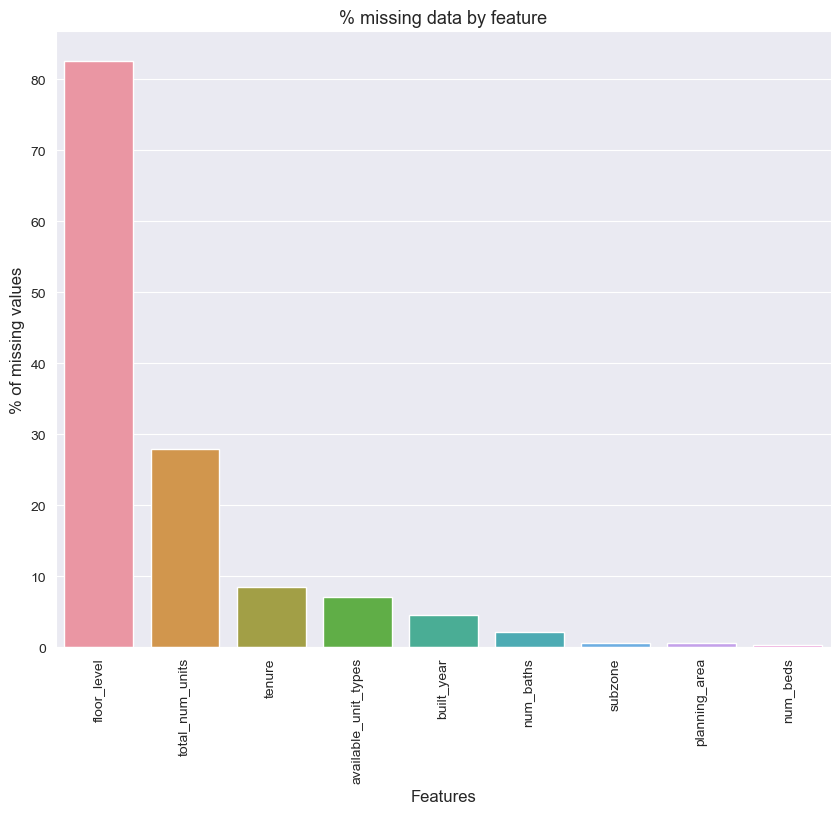

In [113]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=12)
plt.ylabel('% of missing values', fontsize=12)
plt.title('% missing data by feature', fontsize=13)

In [114]:
trainX.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,floor_level,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,NaN,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,NaN,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,low,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,condo,freehold,2023.0,3.0,2.0,958,NaN,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,NaN,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core


In [115]:
df_trainY = pd.DataFrame(data=trainY, columns=['price'])
column_names = list(trainX.columns.values)
column_names.append('price')
train_X_Y = pd.concat([trainX, df_trainY],axis=1, ignore_index=True, sort=False)
train_X_Y.columns = column_names

In [116]:
train_X_Y.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0


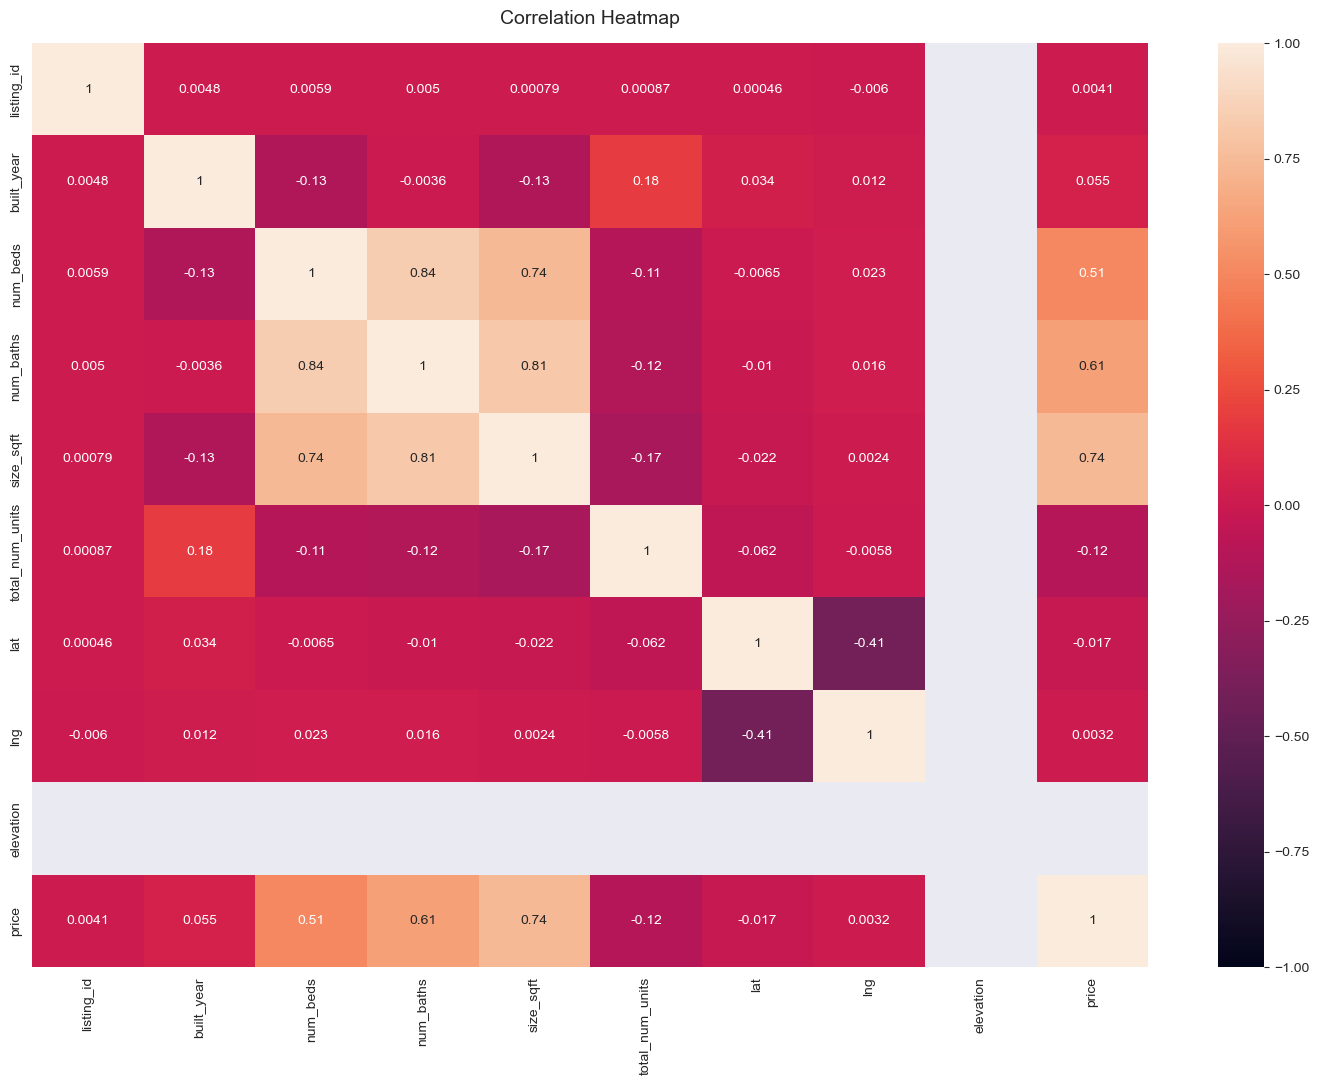

In [117]:
# Increase the size of the heatmap.
plt.figure(figsize=(18, 12))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
ax = sns.heatmap(train_X_Y.corr(), vmin=-1, vmax=1, annot=True)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14)
ax.tick_params(axis='x', rotation=90)

In [118]:
df_property_type_average_price = train_X_Y.groupby('property_type', as_index=False)['price'].mean()
df_property_type_average_price.rename(columns={'price': 'average_price'}, inplace=True)
df_property_type_average_price.sort_values(by=['average_price'], ascending=False, inplace=True)

In [119]:
df_property_type_average_price.head(100)

,property_type,average_price
7,good class bungalow,3.783150e+07
1,bungalow,1.717314e+07
4,conservation house,8.641843e+06
16,semi-detached house,7.707025e+06
5,corner terrace,6.230950e+06
15,landed,5.409970e+06
19,townhouse,5.171600e+06
18,terraced house,4.874620e+06
2,cluster house,4.429750e+06
0,apartment,3.433778e+06


[Text(0.5, 1.0, 'Average prices of different property_types'),
 Text(0.5, 0, 'average_price'),
 Text(0, 0.5, 'property_type')]

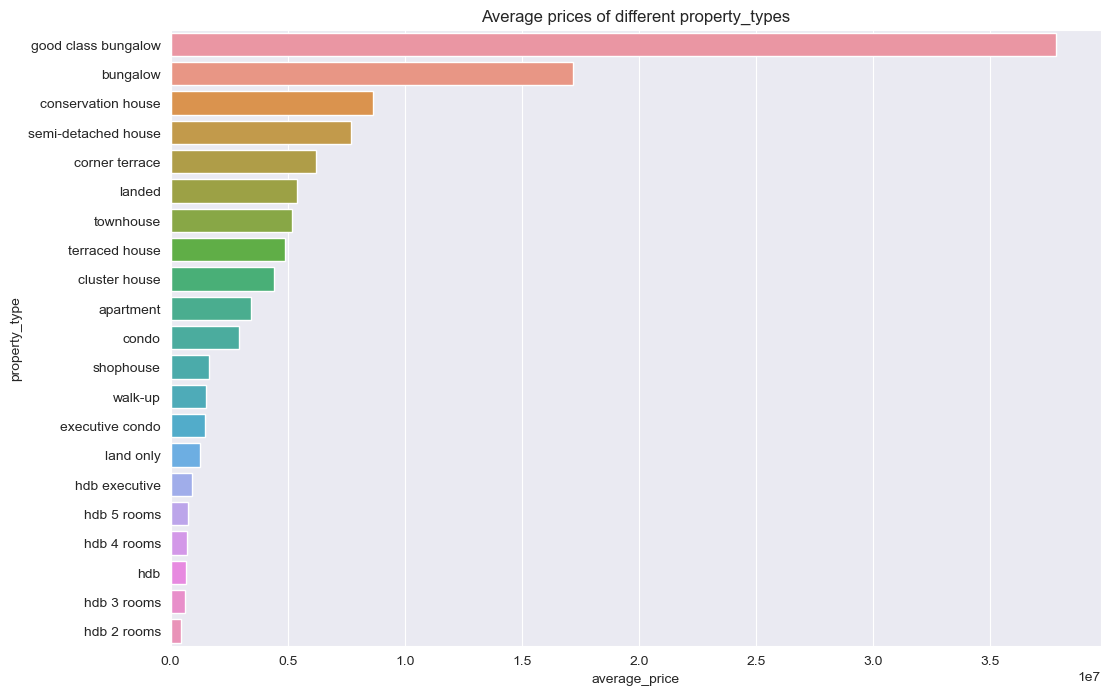

In [120]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_property_type_average_price, y='property_type', x='average_price', orient='h')
ax.set(title='Average prices of different property_types', xlabel='average_price', ylabel='property_type')
# container = ax.containers[0]
# ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
# ax.bar_label(ax.containers[0])
# ax.tick_params(axis='x', rotation=90)

In [121]:
df_property_type_counts = train_X_Y.groupby('property_type', as_index=False)['price'].count()
df_property_type_counts.rename(columns={'price': 'count'}, inplace=True)
df_property_type_counts.sort_values(by=['count'], ascending=False, inplace=True)

In [56]:
df_property_type_counts.head(100)

,property_type,count
3,condo,9542
8,hdb,2793
10,hdb 3 rooms,1190
11,hdb 4 rooms,1114
16,semi-detached house,1017
6,executive condo,1008
1,bungalow,745
12,hdb 5 rooms,674
0,apartment,540
18,terraced house,445


[Text(0.5, 1.0, 'Counts of different property_types'),
 Text(0.5, 0, 'count'),
 Text(0, 0.5, 'property_type')]

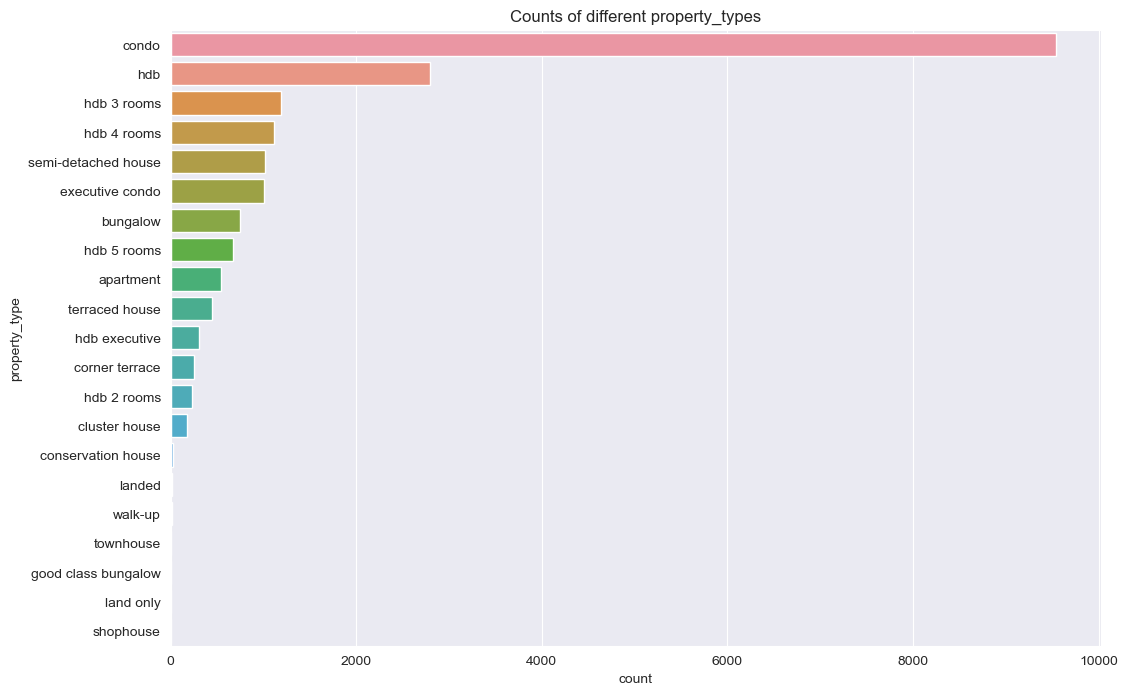

In [57]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_property_type_counts, y='property_type', x='count', orient='h')
ax.set(title='Counts of different property_types', xlabel='count', ylabel='property_type')
# ax.bar_label(ax.containers[0])

In [58]:
df_built_year_average_price = train_X_Y.groupby('built_year', as_index=False)['price'].mean()
df_built_year_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [59]:
df_built_year_average_price.head(100)

,built_year,average_price
0,1963.0,4.326788e+06
1,1967.0,4.519658e+05
2,1968.0,8.046500e+05
3,1969.0,3.885268e+05
4,1970.0,3.476493e+06
...,...,...
58,2024.0,2.876042e+06
59,2025.0,3.480338e+06
60,2026.0,2.623259e+06
61,2027.0,1.589830e+06


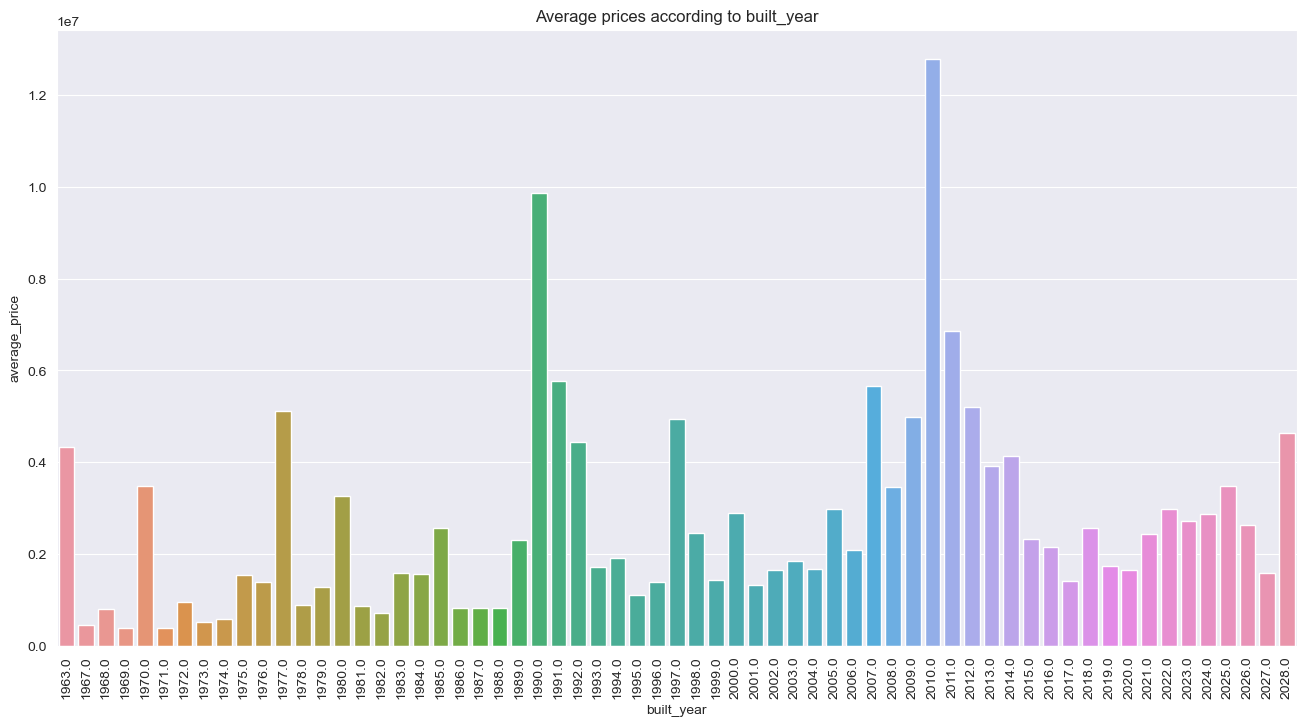

In [60]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_built_year_average_price, x='built_year', y='average_price')
ax.set(title='Average prices according to built_year', xlabel='built_year', ylabel='average_price')
ax.tick_params(axis='x', rotation=90)

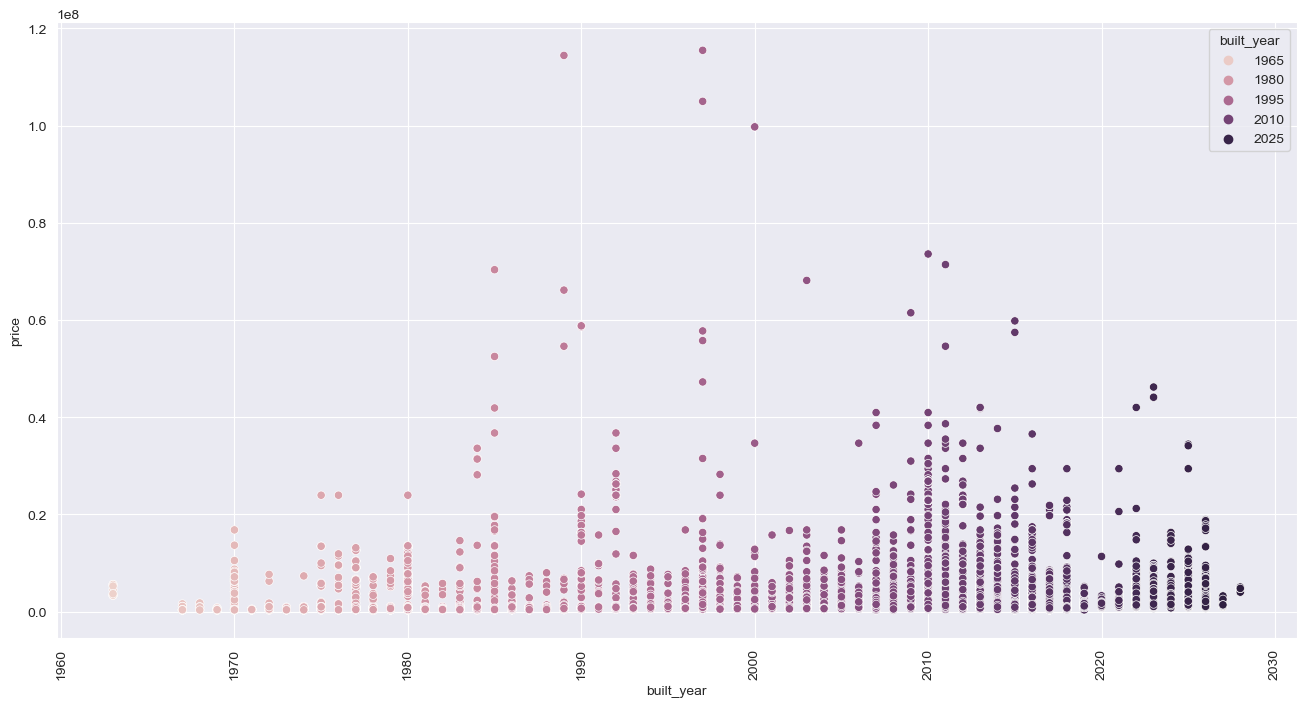

In [61]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(data=train_X_Y, x='built_year', y='price', hue='built_year')
ax.tick_params(axis='x', rotation=90)

In [62]:
df_num_beds_average_price = train_X_Y.groupby('num_beds', as_index=False)['price'].mean()
df_num_beds_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [63]:
df_num_beds_average_price.head(100)

,num_beds,average_price
0,1.0,1.285755e+06
1,2.0,1.511315e+06
2,3.0,1.716479e+06
3,4.0,4.036771e+06
4,5.0,8.159848e+06
5,6.0,1.046793e+07
6,7.0,1.352549e+07
7,8.0,1.872304e+07
8,9.0,1.517184e+07
9,10.0,1.609049e+07


[Text(0.5, 1.0, 'Variation of Average price with num_beds'),
 Text(0.5, 0, 'num_beds'),
 Text(0, 0.5, 'average_price')]

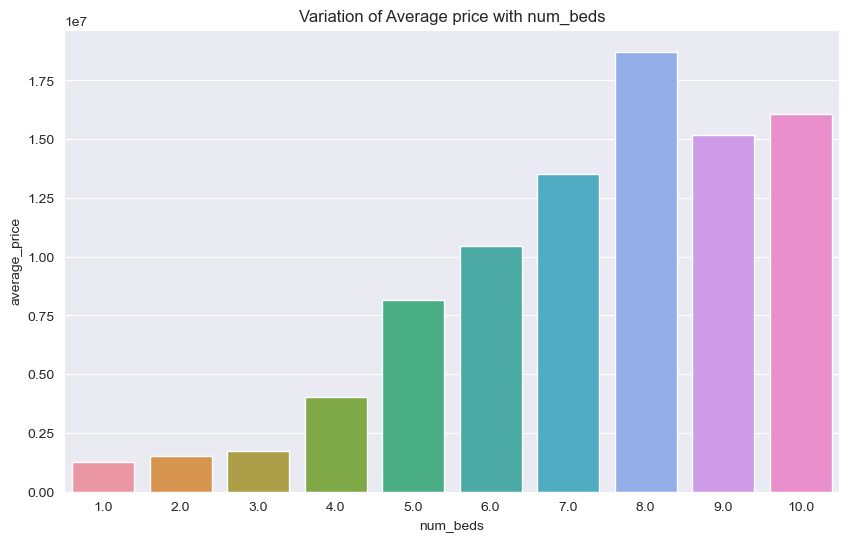

In [64]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_num_beds_average_price, x='num_beds', y='average_price')
ax.set(title='Variation of Average price with num_beds', xlabel='num_beds', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with num_beds'),
 Text(0.5, 0, 'num_beds'),
 Text(0, 0.5, 'price')]

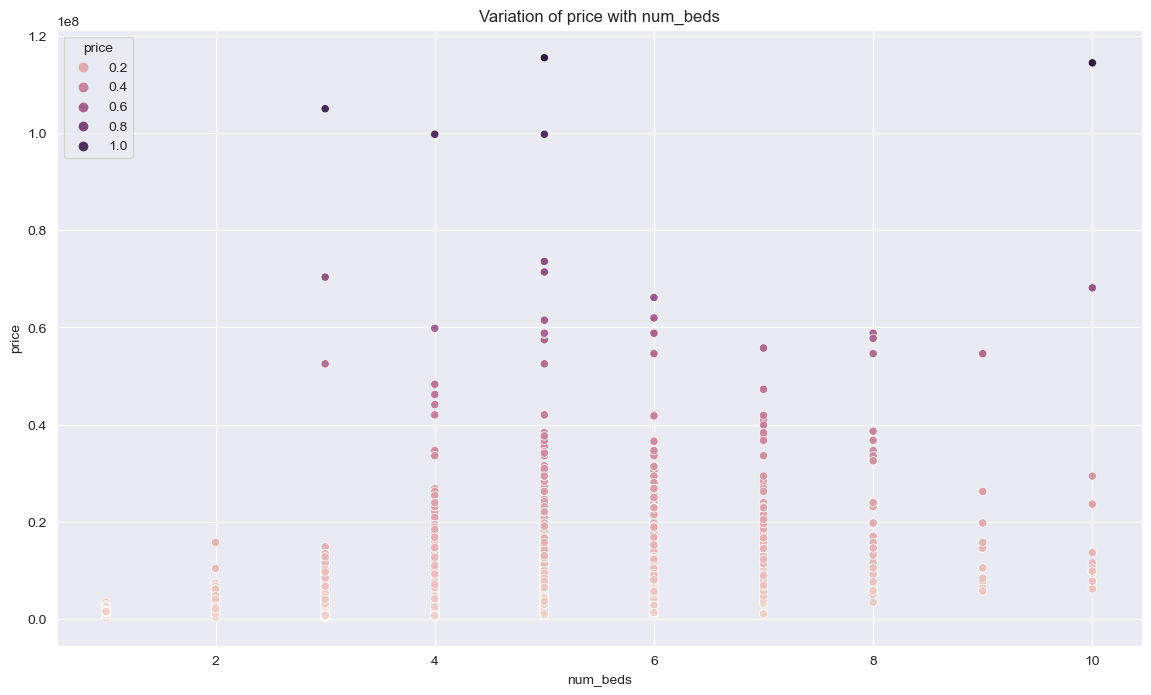

In [66]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='num_beds', y='price', hue='price')
ax.set(title='Variation of price with num_beds', xlabel='num_beds', ylabel='price')

[Text(0.5, 1.0, 'Variation of price with num_beds'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'num_beds')]

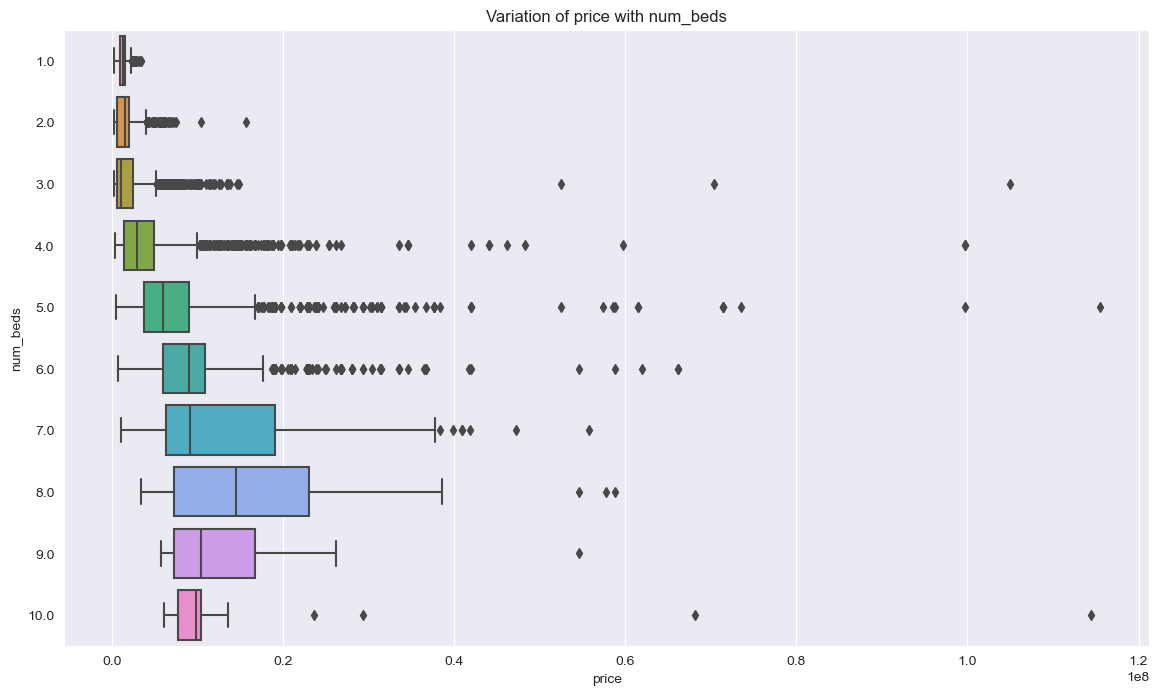

In [67]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=train_X_Y, x='price', y='num_beds', orient='h')
ax.set(title='Variation of price with num_beds', xlabel='price', ylabel='num_beds')

In [68]:
df_num_baths_average_price = train_X_Y.groupby('num_baths', as_index=False)['price'].mean()
df_num_baths_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [69]:
df_num_baths_average_price.head(100)

,num_baths,average_price
0,1.0,1.320352e+06
1,2.0,1.357821e+06
2,3.0,3.014553e+06
3,4.0,5.556706e+06
4,5.0,9.262360e+06
5,6.0,1.007677e+07
6,7.0,1.169864e+07
7,8.0,1.598715e+07
8,9.0,1.819608e+07
9,10.0,1.796815e+07


[Text(0.5, 1.0, 'Variation of Average price with num_baths'),
 Text(0.5, 0, 'num_baths'),
 Text(0, 0.5, 'average_price')]

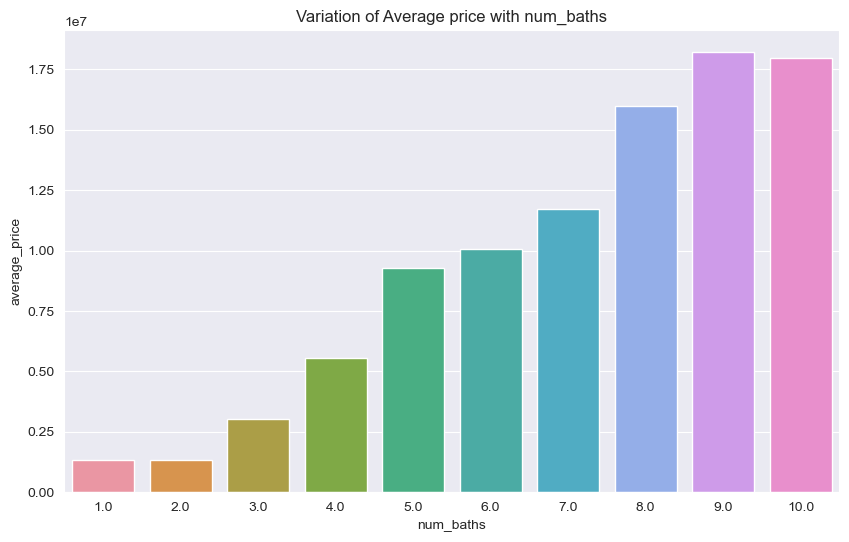

In [70]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_num_baths_average_price, x='num_baths', y='average_price')
ax.set(title='Variation of Average price with num_baths', xlabel='num_baths', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with num_baths'),
 Text(0.5, 0, 'num_baths'),
 Text(0, 0.5, 'price')]

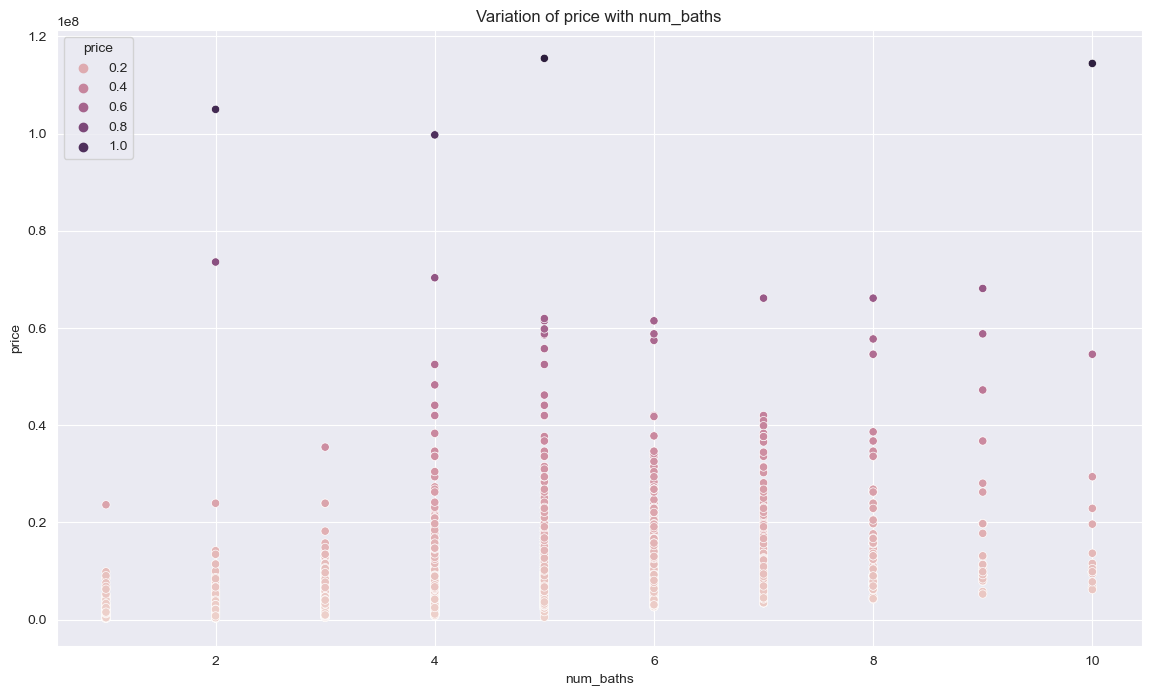

In [71]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='num_baths', y='price', hue='price')
ax.set(title='Variation of price with num_baths', xlabel='num_baths', ylabel='price')

[Text(0.5, 1.0, 'Variation of price with num_baths'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'num_baths')]

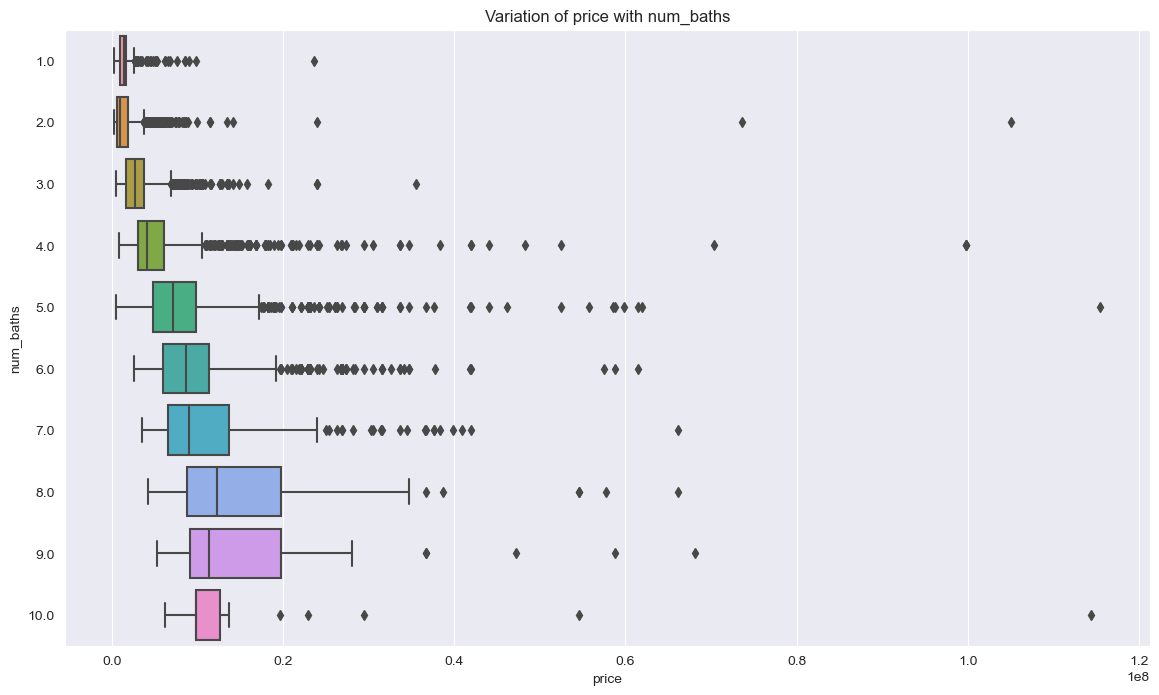

In [72]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=train_X_Y, x='price', y='num_baths', orient='h')
ax.set(title='Variation of price with num_baths', xlabel='price', ylabel='num_baths')

In [73]:
def label_size_sqft(row):
    if row['size_sqft'] < 0:
        return -1
    if row['size_sqft'] > 0 and row['size_sqft'] <= 500:
        return 1
    if row['size_sqft'] > 500 and row['size_sqft'] <= 800:
        return 2
    if row['size_sqft'] > 800 and row['size_sqft'] <= 1100:
        return 3
    if row['size_sqft'] > 1100 and row['size_sqft'] <= 1500:
        return 4
    if row['size_sqft'] > 1500 and row['size_sqft'] <= 2000:
        return 5
    if row['size_sqft'] > 2000 and row['size_sqft'] <= 3000:
        return 6
    if row['size_sqft'] > 3000 and row['size_sqft'] <= 4000:
        return 7
    if row['size_sqft'] > 4000 and row['size_sqft'] <= 5000:
        return 8
    if row['size_sqft'] > 5000 and row['size_sqft'] <= 8000:
        return 9
    if row['size_sqft'] > 8000 and row['size_sqft'] <= 12000:
        return 10
    if row['size_sqft'] > 12000 and row['size_sqft'] <= 30000:
        return 11
    if row['size_sqft'] > 30000:
        return 12
    
train_X_Y['size_sqft_range'] = train_X_Y.apply(lambda row: label_size_sqft(row), axis=1)

In [74]:
train_X_Y['size_sqft_range'].value_counts()

4     5250
3     4693
2     4150
5     1695
9     1028
6      946
1      823
7      607
8      581
10     306
11      38
Name: size_sqft_range, dtype: int64

In [75]:
df_size_sqft_range_average_price = train_X_Y.groupby('size_sqft_range', as_index=False)['price'].mean()
df_size_sqft_range_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [76]:
df_size_sqft_range_average_price.head(50)

,size_sqft_range,average_price
0,1,1.169074e+06
1,2,1.278698e+06
2,3,1.407556e+06
3,4,1.890256e+06
4,5,2.858818e+06
5,6,6.609154e+06
6,7,6.447083e+06
7,8,8.379955e+06
8,9,1.111721e+07
9,10,2.027297e+07


[Text(0.5, 1.0, 'Variation of Average price with size_sqft_range'),
 Text(0.5, 0, 'size_sqft_range'),
 Text(0, 0.5, 'average_price')]

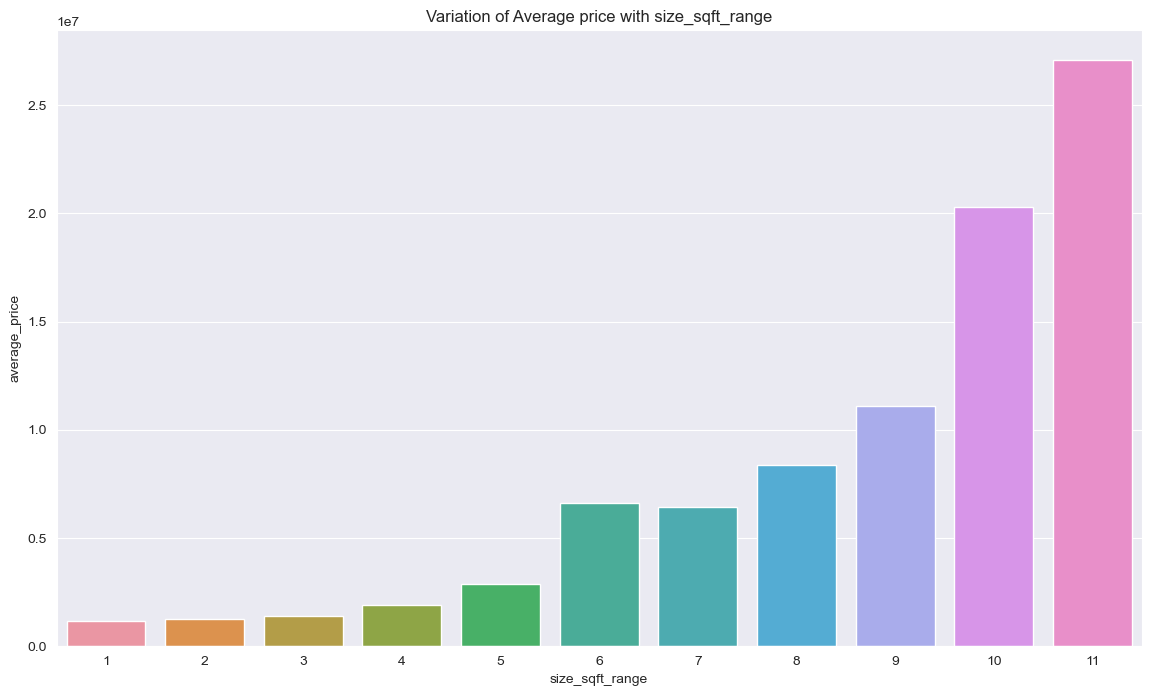

In [77]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_size_sqft_range_average_price, x='size_sqft_range', y='average_price')
ax.set(title='Variation of Average price with size_sqft_range', xlabel='size_sqft_range', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with size_sqft_range'),
 Text(0.5, 0, 'size_sqft_range'),
 Text(0, 0.5, 'price')]

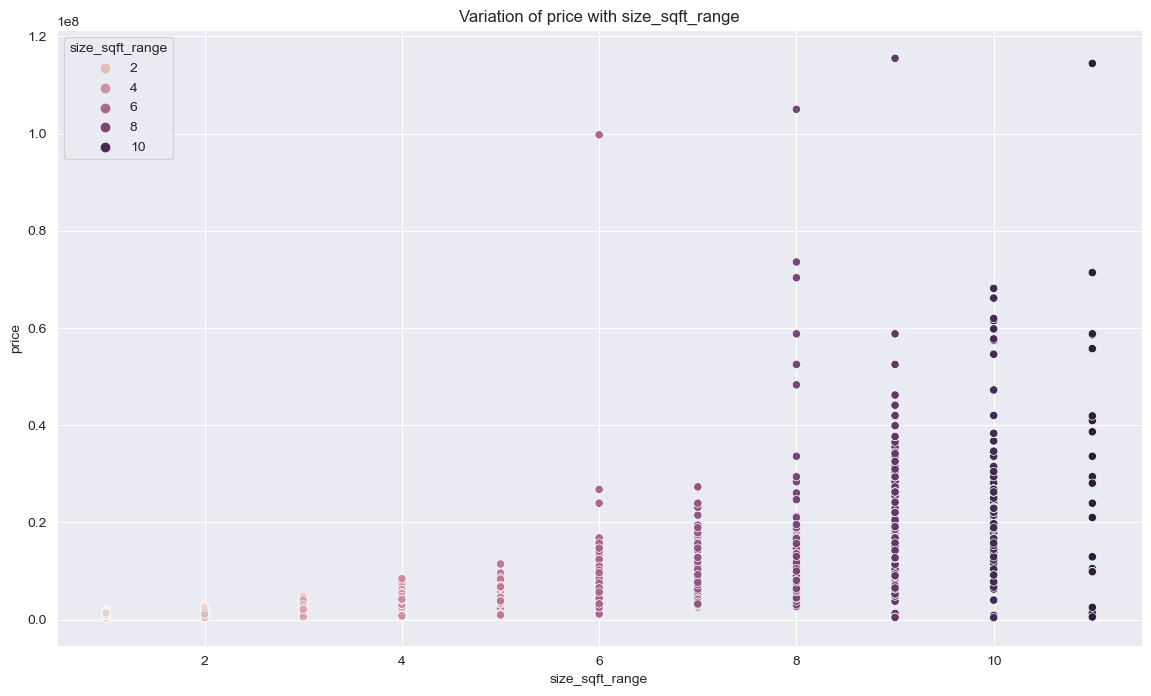

In [78]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='size_sqft_range', y='price', hue='size_sqft_range')
ax.set(title='Variation of price with size_sqft_range', xlabel='size_sqft_range', ylabel='price')

In [98]:
df_furnishing_average_price = train_X_Y.groupby('furnishing', as_index=False)['price'].mean()
df_furnishing_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [99]:
df_furnishing_average_price.head(50)

,furnishing,average_price
0,fully,2.184725e+06
1,na,6.394320e+06
2,partial,2.830188e+06
3,unfurnished,2.889106e+06
4,unspecified,3.144822e+06


[Text(0.5, 1.0, 'Variation of Average price with furnishing'),
 Text(0.5, 0, 'furnishing'),
 Text(0, 0.5, 'average_price')]

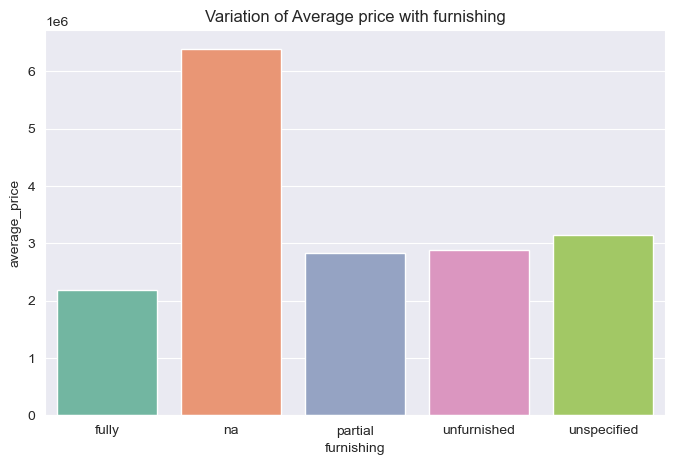

In [100]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_furnishing_average_price, x='furnishing', y='average_price')
ax.set(title='Variation of Average price with furnishing', xlabel='furnishing', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with furnishing'),
 Text(0.5, 0, 'furnishing'),
 Text(0, 0.5, 'price')]

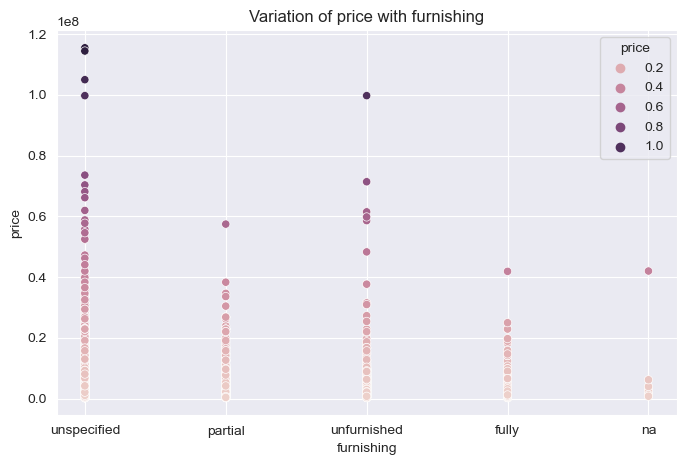

In [101]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=train_X_Y, x='furnishing', y='price', hue='price')
ax.set(title='Variation of price with furnishing', xlabel='furnishing', ylabel='price')

[Text(0.5, 1.0, 'Variation of price with furnishing'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'furnishing')]

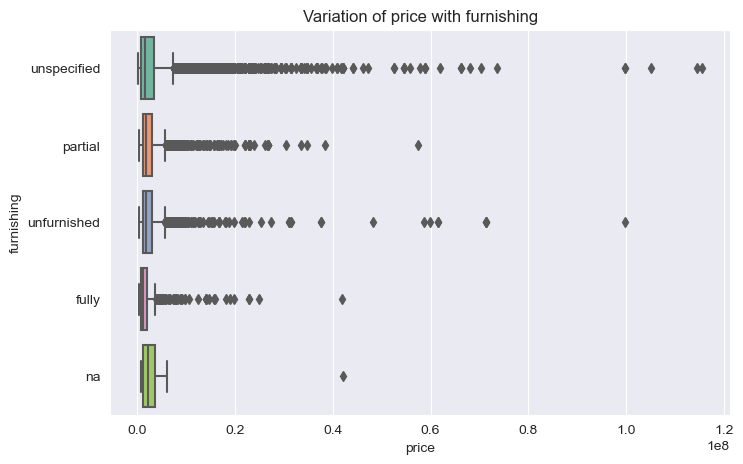

In [102]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=train_X_Y, x='price', y='furnishing', orient='h')
ax.set(title='Variation of price with furnishing', xlabel='price', ylabel='furnishing')

([<matplotlib.patches.Wedge at 0x7f9b9e02ee80>,
 [Text(-0.7155905396072195, 0.8354221565320425, 'unspecified'),
  Text(0.3369437273294648, -1.0471241209204032, 'partial'),
  Text(0.9752696786894146, -0.5087721040201066, 'unfurnished'),
  Text(1.0959890377846533, -0.09385110045103426, 'fully'),
  Text(1.0999986583322936, -0.001718041662577274, 'na')],
 [Text(-0.3903221125130288, 0.4556848126538413, '73%'),
  Text(0.18378748763425354, -0.571158611411129, '15%'),
  Text(0.5319652792851352, -0.27751205673824, '10%'),
  Text(0.5978122024279926, -0.051191509336927773, '3%'),
  Text(0.5999992681812509, -0.0009371136341330585, '0%')])

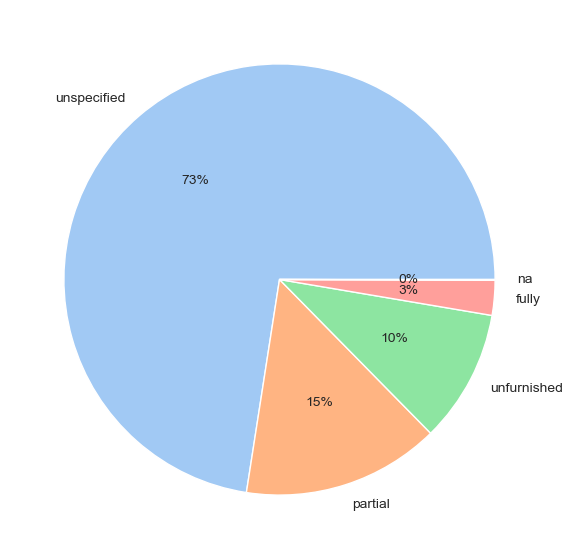

In [103]:
df = train_X_Y['furnishing'].value_counts()
plt.figure(figsize=(12, 7))
colors = sns.color_palette('pastel')[0:5]
plt.pie(df, labels=df.index, colors=colors, autopct='%.0f%%')

In [104]:
df_planning_area_average_price = train_X_Y.groupby('planning_area', as_index=False)['price'].mean()
df_planning_area_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [105]:
df_planning_area_average_price.head(50)

,planning_area,average_price
0,ang mo kio,2.355193e+06
1,bedok,3.128573e+06
2,bishan,2.762574e+06
3,bukit batok,1.610009e+06
4,bukit merah,2.753352e+06
5,bukit panjang,1.805142e+06
6,bukit timah,5.626686e+06
7,central water catchment,2.337933e+06
8,changi,3.824867e+06
9,choa chu kang,7.643136e+05


[Text(0.5, 1.0, 'Variation of Average price with planning_area'),
 Text(0.5, 0, 'planning_area'),
 Text(0, 0.5, 'average_price')]

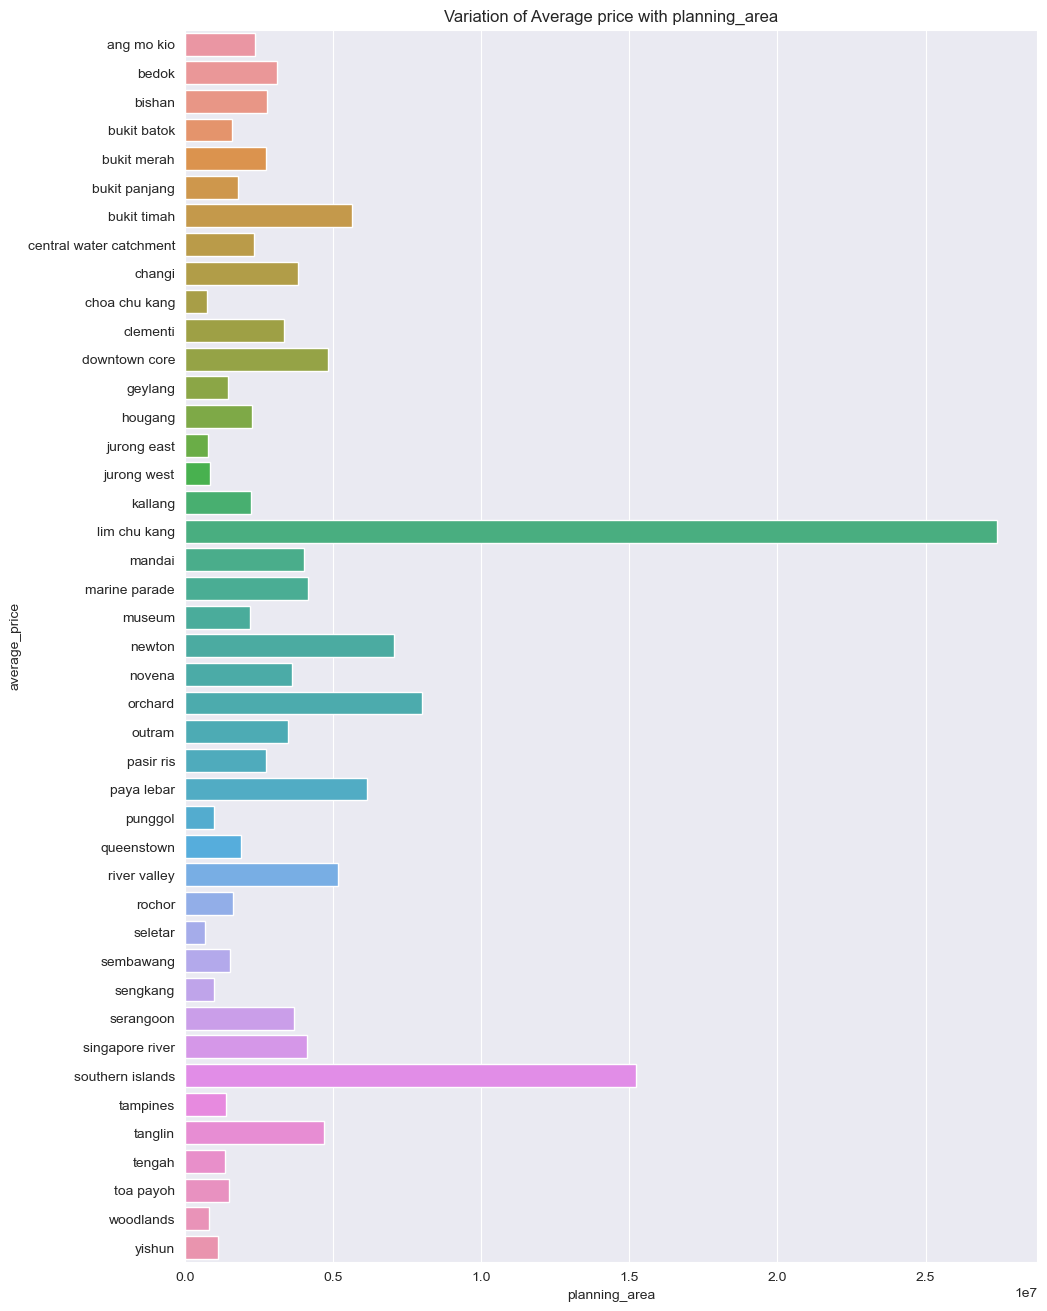

In [106]:
plt.figure(figsize=(11, 16))
ax = sns.barplot(data=df_planning_area_average_price, x='average_price', y='planning_area', orient='h')
ax.set(title='Variation of Average price with planning_area', xlabel='planning_area', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

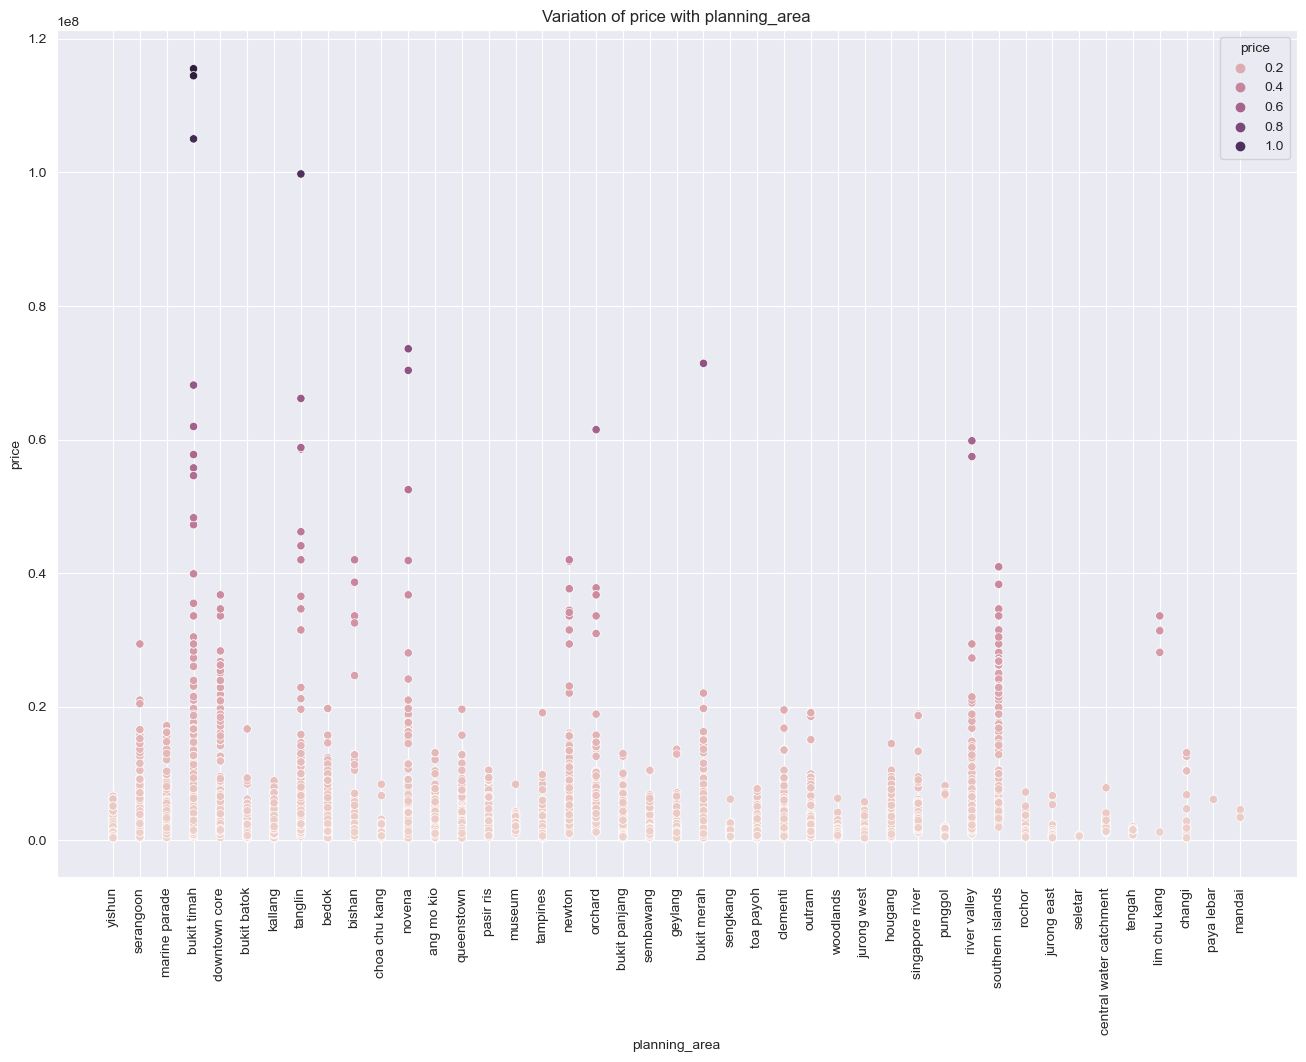

In [107]:
plt.figure(figsize=(16, 11))
ax = sns.scatterplot(data=train_X_Y, x='planning_area', y='price', hue='price')
ax.set(title='Variation of price with planning_area', xlabel='planning_area', ylabel='price')
ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with planning_area'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'planning_area')]

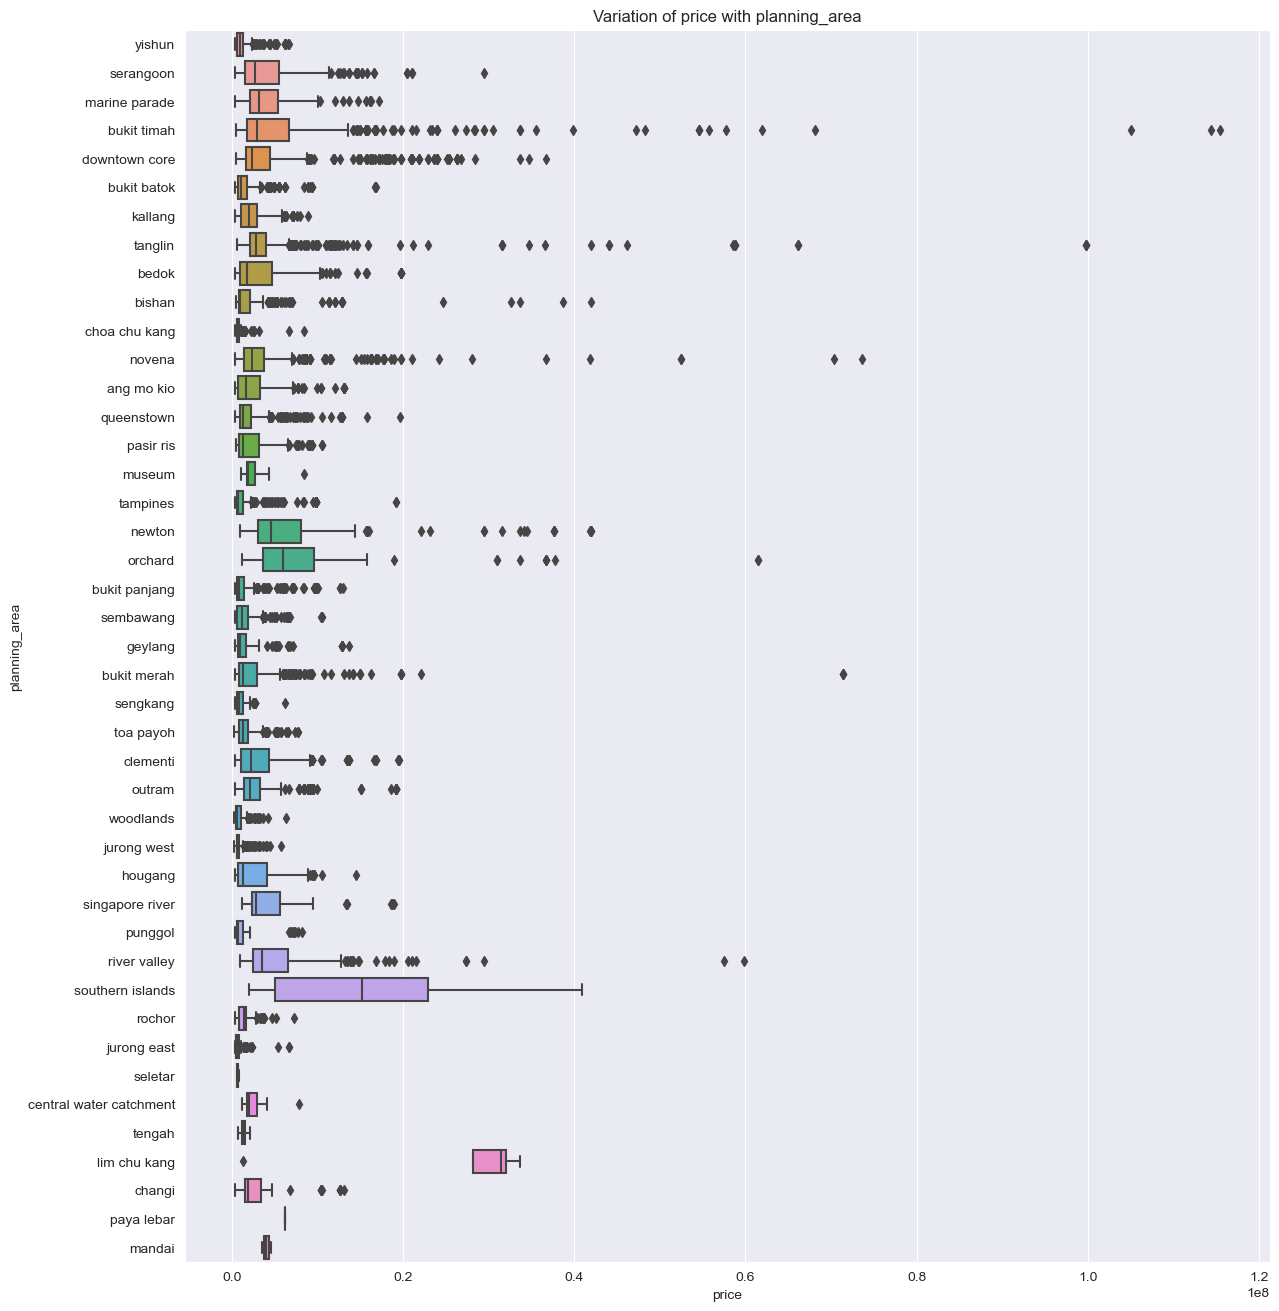

In [108]:
plt.figure(figsize=(14, 16))
ax = sns.boxplot(data=train_X_Y, x='price', y='planning_area', orient='h')
ax.set(title='Variation of price with planning_area', xlabel='price', ylabel='planning_area')